In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
Sources: 
- Topic: https://data.worldbank.org/topic/climate-change
- CO2(kt): https://data.worldbank.org/topic/EN.ATM.CO2E.KT
- Forest(km2): https://data.worldbank.org/topic/AG.LND.FRST.K2
- Agriculture(km2): https://data.worldbank.org/topic/AG.LND.AGRI.K2
- Population(7nM): https://data.worldbank.org/topic/SP.POP.TOTL
- Electric power consumption (kWh per capita): https://data.worldbank.org/topic/EG.USE.ELEC.KH.PC

In [2]:
df_agri = pd.read_csv('db/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header = 2)
df_fore = pd.read_csv('db/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header = 2)
df_elec = pd.read_csv('db/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header = 2)
df_co2e = pd.read_csv('db/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header = 2)
df_popu = pd.read_csv('db/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header = 2)

# Set format

year between 1970 and 2015

In [3]:
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2016)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [4]:
df_agri.loc[:, cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.000000,379100.000000,379100.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000
2,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,575900.000000,576900.000000,576900.000000,582900.000000,583900.000000,589900.000000,589900.000000,591900.000000,591900.000000,591900.000000
3,Albania,ALB,12000.0,11740.0,11460.0,11220.0,10800.0,10750.0,11090.0,11140.0,...,11200.000000,11190.000000,11810.000000,12013.000488,12013.000488,12010.000000,12013.000488,11873.000488,11742.900391,11743.000488
4,Andorra,AND,250.0,250.0,240.0,240.0,240.0,230.0,230.0,230.0,...,217.800007,207.700005,207.600002,207.700005,197.700005,197.700005,187.600002,188.099995,188.099995,188.099995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,236270.000000,236270.000000,235170.000000,234520.000000,235790.000000,234520.000000,235500.000000,235460.000000,235460.000000,235460.000000
261,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,968880.000000,968900.000000,971080.000000,969880.000000,968910.000000,963740.000000,968410.000000,968410.000000,968410.000000,968410.000000
262,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,230480.000000,229840.000000,230870.000000,235860.000000,234360.000000,236360.000000,238360.000000,237360.000000,238360.000000,238360.000000


## Convert columns by year

In [5]:
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns = {
        'variable' : 'date',
        'Country Name' : 'Country',
        'Country Code' : 'name',
        'value' : 'agriculture'
    })

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11875,Kosovo,XKX,2015,NaN
11876,"Yemen, Rep.",YEM,2015,235460.0
11877,South Africa,ZAF,2015,968410.0
11878,Zambia,ZMB,2015,238360.0


# Set format to all dataframes

Create a function for set same format to all dataframes

In [6]:
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2016)))

def fun_format(df, col):
    return df.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(
            columns = {
                'variable' : 'date',
                'Country Name' : 'Country',
                'Country Code' : 'name',
                'value' : col
            })

In [7]:
df_agri = fun_format(df_agri, 'agriculture')
df_co2e = fun_format(df_co2e, 'co2')
df_elec = fun_format(df_elec, 'electricprod')
df_fore = fun_format(df_fore, 'forest')
df_popu = fun_format(df_popu, 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11875,Kosovo,XKX,2015,1801800.0
11876,"Yemen, Rep.",YEM,2015,26497889.0
11877,South Africa,ZAF,2015,55386367.0
11878,Zambia,ZMB,2015,15879361.0


# Merge dataframes

In [8]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11880 non-null  object 
 1   name        11880 non-null  object 
 2   date        11880 non-null  object 
 3   population  11763 non-null  float64
dtypes: float64(1), object(3)
memory usage: 371.4+ KB


In [9]:
df_merge = pd.merge(df_popu, df_agri, on=['Country', 'date', 'name'], how = 'inner')
df_merge = pd.merge(df_merge, df_co2e, on=['Country', 'date', 'name'], how = 'inner')
df_merge = pd.merge(df_merge, df_elec, on=['Country', 'date', 'name'], how = 'inner')
df_merge = pd.merge(df_merge, df_fore, on=['Country', 'date', 'name'], how = 'inner')
df_merge

,Country,name,date,population,agriculture,co2,electricprod,forest
0,Aruba,ABW,1971,59440.0,20.0,NaN,NaN,NaN
1,Afghanistan,AFG,1971,11475445.0,380360.0,1895.839,NaN,NaN
2,Angola,AGO,1971,6040777.0,574000.0,3410.310,92.041140,NaN
3,Albania,ALB,1971,2187853.0,12000.0,4352.729,532.028432,NaN
4,Andorra,AND,1971,25559.0,250.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11875,Kosovo,XKX,2015,1801800.0,NaN,NaN,NaN,NaN
11876,"Yemen, Rep.",YEM,2015,26497889.0,235460.0,NaN,NaN,5490.0
11877,South Africa,ZAF,2015,55386367.0,968410.0,NaN,NaN,92410.0
11878,Zambia,ZMB,2015,15879361.0,238360.0,NaN,NaN,486350.0


In [20]:
df_merge['date'] = df_merge['date'].astype(float)

# Analize dataframe

In [21]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [22]:
df_climate = df_merge.dropna()

## Top co2 countries

In [23]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending = False)

Country
World                       25,646,998.0
High income                 12,947,592.3
OECD members                12,363,378.5
Post-demographic dividend   11,802,892.2
IDA & IBRD total            11,727,213.4
                                ...     
South Sudan                      1,448.5
Togo                             1,338.5
Congo, Rep.                      1,279.8
Niger                              810.4
Eritrea                            614.2
Name: co2, Length: 180, dtype: float64

In [24]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending = False).head(25).index

Index(['World', 'High income', 'OECD members', 'Post-demographic dividend',
       'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only',
       'Upper middle income', 'Late-demographic dividend',
       'East Asia & Pacific', 'Europe & Central Asia', 'North America',
       'United States', 'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)',
       'Early-demographic dividend', 'European Union', 'China',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'Euro area',
       'Lower middle income', 'Russian Federation',
       'Middle East & North Africa'],
      dtype='object', name='Country')

In [25]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending = False).head(10).index
first_10

Index(['World', 'High income', 'OECD members', 'Post-demographic dividend',
       'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only',
       'Upper middle income', 'Late-demographic dividend'],
      dtype='object', name='Country')

In [26]:
df_max_co2 = df_climate[df_climate['Country'].isin(first_10)]
df_max_co2

,Country,name,date,population,agriculture,co2,electricprod,forest
5109,High income,HIC,"1,990.0","1,004,169,206.0","13,204,639.0","11,450,105.4","7,296.3","9,968,629.1"
5116,IBRD only,IBD,"1,990.0","3,468,162,855.0","19,215,632.0","9,007,209.2","1,019.4","23,952,980.0"
5117,IDA & IBRD total,IBT,"1,990.0","4,307,407,025.0","27,887,675.0","9,423,883.8",897.1,"30,984,008.0"
5154,Low & middle income,LMY,"1,990.0","4,277,170,872.0","27,465,695.0","9,049,707.6",873.3,"30,765,148.0"
5156,Late-demographic dividend,LTE,"1,990.0","1,849,526,605.0","10,780,451.0","6,238,090.8","1,337.6","17,275,796.2"
...,...,...,...,...,...,...,...,...
11506,Middle income,MIC,"2,014.0","5,433,979,884.0","30,469,742.0","21,011,743.3","2,064.2","26,243,619.8"
11531,OECD members,OED,"2,014.0","1,272,282,569.0","12,225,978.3","12,151,110.5","8,009.0","10,794,506.1"
11548,Post-demographic dividend,PST,"2,014.0","1,092,096,206.0","11,004,079.3","11,313,886.8","8,899.6","9,957,119.7"
11599,Upper middle income,UMC,"2,014.0","2,577,855,859.0","20,543,461.5","16,827,139.3","3,496.1","20,200,803.8"


/mnt/c/Users/j_cam/Documents/Proyectos/usingPandas/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='population', ylabel='co2'>

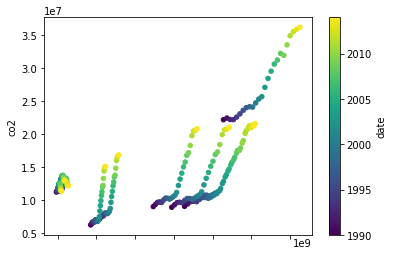

In [27]:
df_max_co2.set_index('Country').plot.scatter(
    x = 'population',
    y = 'co2',
    c = 'date',
    colormap = 'viridis'
)

## Correlations

In [28]:
df_climate.corr()

,date,population,agriculture,co2,electricprod,forest
date,1.0,0.0,-0.0,0.1,0.1,-0.0
population,0.0,1.0,1.0,0.9,-0.1,0.9
agriculture,-0.0,1.0,1.0,0.9,-0.1,1.0
co2,0.1,0.9,0.9,1.0,0.0,0.9
electricprod,0.1,-0.1,-0.1,0.0,1.0,-0.1
forest,-0.0,0.9,1.0,0.9,-0.1,1.0


In [29]:
import seaborn as sns

<AxesSubplot:>

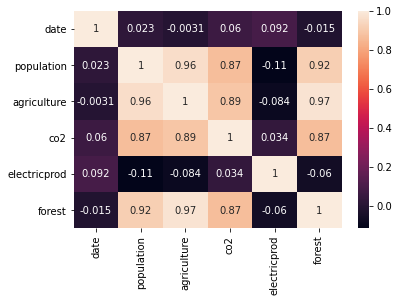

In [31]:
sns.heatmap(df_climate.corr(), annot = True)

# Analize all data as one (no countries)

In [32]:
df_med = df_climate.groupby('date').median()
df_med

,population,agriculture,co2,electricprod,forest
date,,,,,
"1,990.0","22,071,433.0","189,300.0","52,009.1",919.4,"138,094.9"
"1,991.0","22,761,766.5","198,880.0","57,335.4",961.8,"138,629.7"
"1,992.0","18,402,734.0","180,700.0","54,322.9","1,231.0","97,542.0"
"1,993.0","18,439,954.0","174,395.0","54,410.9","1,266.8","97,963.0"
"1,994.0","18,214,470.0","173,080.0","57,054.9","1,304.0","98,464.0"
"1,995.0","18,242,912.0","164,580.0","55,155.3","1,347.6","98,985.0"
"1,996.0","18,367,288.0","173,370.0","55,910.7","1,380.1","99,466.0"
"1,997.0","18,517,000.0","173,270.0","56,394.8","1,426.7","99,947.0"
"1,998.0","19,247,152.0","164,285.0","57,729.6","1,498.7","97,528.0"


<AxesSubplot:>

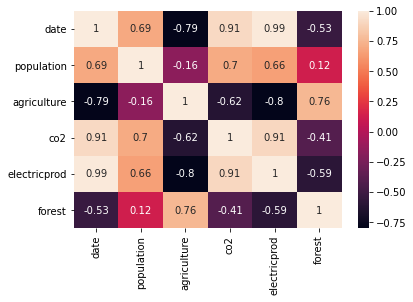

In [33]:
sns.heatmap(df_med.reset_index().corr(), annot = True)

In [35]:
from pandas.plotting import scatter_matrix

/mnt/c/Users/j_cam/Documents/Proyectos/usingPandas/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='population', ylabel='population'>,
        <AxesSubplot:xlabel='agriculture', ylabel='population'>,
        <AxesSubplot:xlabel='co2', ylabel='population'>,
        <AxesSubplot:xlabel='electricprod', ylabel='population'>,
        <AxesSubplot:xlabel='forest', ylabel='population'>],
       [<AxesSubplot:xlabel='date', ylabel='agriculture'>,
        <AxesSubplot:xlabel='population', ylabel='agriculture'>,
        <AxesSubplot:xlabel='agriculture', ylabel='agriculture'>,
        <AxesSubplot:xlabel='co2', ylabel='agriculture'>,
        <AxesSubplot:xlabel='electricprod', yl

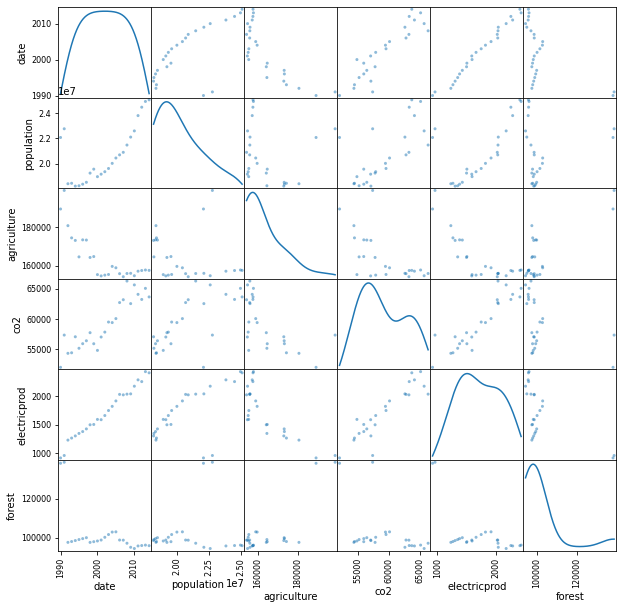

In [38]:
scatter_matrix(df_med.reset_index(), diagonal = 'kde', figsize = (10, 10))

In [39]:
from pandas.plotting import parallel_coordinates

In [41]:
df_samerica = df_climate[
    df_climate['Country'].isin(['Colombia', 
        'Argentina', 
        'Bolivia', 
        'Mexico', 
        'Peru', 
        'Chile'])
    ][['Country', 
        'co2', 
        'agriculture', 
        'forest']]

df_samerica

,Country,co2,agriculture,forest
5023,Argentina,"112,147.9","1,275,650.0","347,930.0"
5042,Bolivia,"5,757.2","354,550.0","627,950.0"
5053,Chile,"33,314.7","158,990.0","152,630.0"
5059,Colombia,"57,337.2","450,830.0","644,170.0"
5168,Mexico,"318,427.6","1,051,510.0","697,600.0"
...,...,...,...,...
11378,Bolivia,"20,410.5","377,020.0","550,530.0"
11389,Chile,"82,562.5","157,612.0","174,342.0"
11395,Colombia,"84,091.6","449,871.6","585,284.6"
11504,Mexico,"480,270.7","1,069,260.0","661,316.0"


<AxesSubplot:>

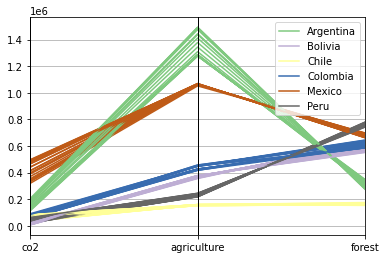

In [43]:
parallel_coordinates(df_samerica, 'Country', colormap = 'Accent')